In [51]:
!pip install asyncpraw


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
pip install nest_asyncio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import asyncpraw
import asyncio
import pandas as pd
import nest_asyncio

# Apply nest_asyncio to allow nested event loops
nest_asyncio.apply()

async def fetch_reddit_data():
    # Step 1: Set up API credentials
    reddit = asyncpraw.Reddit(
        client_id="pD6wS0qaACjqJyyY34_lJA",
        client_secret="l2mZYs7gVDCWpS02DgwwI3ehGt7QZQ",
        user_agent="Stock_Analysis v1.0 by u/Impressive_Row_6660",
    )

    # Subreddits to fetch data from
    subreddits = [
        "stocks", "investing", "StockMarket",
        "wallstreetbets", "pennystocks",
        "ValueInvesting", "GrowthInvesting"
    ]
    data = []
    post_count = 5842  # Specify the number of posts to fetch per subreddit

    # Fetch data from each subreddit
    for subreddit_name in subreddits:
        subreddit = await reddit.subreddit(subreddit_name)
        async for post in subreddit.top(limit=post_count, time_filter='all'):  # Fetch top posts of all time
            data.append({
                "subreddit": subreddit_name,
                "title": post.title,
                "selftext": post.selftext,
                "score": post.score,
                "comments": post.num_comments,
                "url": post.url,
                "created_utc": post.created_utc,
            })

    # Step 5: Save data to a DataFrame
    df = pd.DataFrame(data)

    # Step 6: Save to CSV
    df.to_csv("reddit_posts.csv", index=False)
    print("Posts have been saved to reddit_posts.csv")

# Run the asynchronous function
asyncio.run(fetch_reddit_data())




Posts have been saved to reddit_posts.csv


In [54]:
# prompt: convert redditpost .csv file in table form

import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("reddit_posts.csv")

# Display the DataFrame as a table
df


,subreddit,title,selftext,score,comments,url,created_utc
0,stocks,"It's fucking awful seeing the ""Silver"" misinfo...","⚠️⚠️⚠️ ***DON'T BUY SILVER, IT'S A TRAP***⚠️⚠️...",102342,4339,https://www.reddit.com/r/stocks/comments/la34b...,1.612186e+09
1,stocks,Companies try to prevent people from trading G...,Not sure about the other trading apps but Trad...,88952,6706,https://www.reddit.com/r/stocks/comments/l6uva...,1.611835e+09
2,stocks,Today is a dark day for traders,"It does not matter if you invested in GME, mad...",45650,2560,https://www.reddit.com/r/stocks/comments/l7awn...,1.611873e+09
3,stocks,BREAKING: Dow falls 240 points as Trump calls ...,[https://www.cnbc.com/2020/10/05/stock-market-...,44007,4412,https://www.reddit.com/r/stocks/comments/j6b8k...,1.602011e+09
4,stocks,GME Dedicated Thread - Breaking: CNBC engages ...,"Hello all,\n\nWe are opening this thread so it...",42053,4824,https://www.reddit.com/r/stocks/comments/l64xv...,1.611756e+09
...,...,...,...,...,...,...,...
5837,GrowthInvesting,A talk with Philip Fisher,NaN,1,0,http://rlaexp.com/studio/biz/financial_investi...,1.524670e+09
5838,GrowthInvesting,Chuck Akre - Google investor talks,NaN,1,0,https://www.youtube.com/watch?v=O38I7QIc_eQ,1.518959e+09
5839,GrowthInvesting,Shopify Beats Estimates But Signs Emerge of Sl...,NaN,1,0,https://www.bloomberg.com/news/articles/2018-0...,1.518959e+09
5840,GrowthInvesting,Undiscovered stocks you should invest in for 2018,NaN,1,0,https://www.reddit.com/r/investing_discussion/...,1.514916e+09


In [55]:
# prompt: Filter out irrelevant content, remove stopwords, handle missing data, stemming and handle noise (e.g., emojis, links, or hashtags). from title

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

# Load th  e CSV file into a pandas DataFrame
df = pd.read_csv("reddit_posts.csv")

def preprocess_text(text):
    if pd.isna(text):  # Handle missing data
        return ""

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Lowercase
    text = text.lower()

    # Tokenize
    tokens = text.split()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(w) for w in tokens]

    return " ".join(tokens)

df['processed_title'] = df['title'].apply(preprocess_text)
df[['title', 'processed_title']]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goela\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,processed_title
0,"It's fucking awful seeing the ""Silver"" misinfo...",fuck aw see silver misinform campaign everywhe...
1,Companies try to prevent people from trading G...,compani tri prevent peopl trade gme amc
2,Today is a dark day for traders,today dark day trader
3,BREAKING: Dow falls 240 points as Trump calls ...,break dow fall point trump call coronaviru sti...
4,GME Dedicated Thread - Breaking: CNBC engages ...,gme dedic thread break cnbc engag market manip...
...,...,...
5837,A talk with Philip Fisher,talk philip fisher
5838,Chuck Akre - Google investor talks,chuck akr googl investor talk
5839,Shopify Beats Estimates But Signs Emerge of Sl...,shopifi beat estim sign emerg slow growth
5840,Undiscovered stocks you should invest in for 2018,undiscov stock invest


In [56]:
# Remove specified columns
columns_to_remove = ["subreddit","score","selftext", "comments", "url", "created_utc","title"]
df = df.drop(columns=columns_to_remove, errors='ignore')
df.head(5)

,processed_title
0,fuck aw see silver misinform campaign everywhe...
1,compani tri prevent peopl trade gme amc
2,today dark day trader
3,break dow fall point trump call coronaviru sti...
4,gme dedic thread break cnbc engag market manip...


In [57]:
df.shape

(5842, 1)

In [58]:
# prompt: rename processed_title as title

df = df.rename(columns={'processed_title': 'title'})
df.head()

,title
0,fuck aw see silver misinform campaign everywhe...
1,compani tri prevent peopl trade gme amc
2,today dark day trader
3,break dow fall point trump call coronaviru sti...
4,gme dedic thread break cnbc engag market manip...


In [59]:

from textblob import TextBlob
def classify_review(title):
    analysis = TextBlob(title)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply the function to create a 'review' column
df['review'] = df['title'].apply(classify_review)

df.head(10)

,title,review
0,fuck aw see silver misinform campaign everywhe...,Negative
1,compani tri prevent peopl trade gme amc,Neutral
2,today dark day trader,Negative
3,break dow fall point trump call coronaviru sti...,Positive
4,gme dedic thread break cnbc engag market manip...,Neutral
5,weekend gme thread homework let stop use broke...,Neutral
6,hasnt robinhood still receiv form punishmentfi...,Neutral
7,robinhood previous sold user inform citadel bl...,Negative
8,anyon els feel realli depress turn event recent,Negative
9,gme taught hour day trade,Neutral


In [60]:
# prompt: in review col convert positive to 1 neutral to 0 and negative to  2

def convert_review(review):
    if review == "Positive":
        return 2
    elif review == "Neutral":
        return 1
    elif review == "Negative":
        return 0
    else:
        return None  # Handle cases where the review is not one of the expected values

# Apply the function to create a new column 'review_numeric'
df['review'] = df['review'].apply(convert_review)

df.head(10)

,title,review
0,fuck aw see silver misinform campaign everywhe...,0
1,compani tri prevent peopl trade gme amc,1
2,today dark day trader,0
3,break dow fall point trump call coronaviru sti...,2
4,gme dedic thread break cnbc engag market manip...,1
5,weekend gme thread homework let stop use broke...,1
6,hasnt robinhood still receiv form punishmentfi...,1
7,robinhood previous sold user inform citadel bl...,0
8,anyon els feel realli depress turn event recent,0
9,gme taught hour day trade,1


In [61]:
# prompt: now make count vectorization in x and take y from df

from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'df' and 'preprocess_text' are defined from the previous code

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the 'title' column
x = vectorizer.fit_transform(df['title']).toarray()

# 'y' is already in df, assuming it's the 'review' column
y = df['review']

In [62]:
x.shape


(5842, 5705)

In [63]:
y.shape

(5842,)

In [64]:
# prompt: split data into two parts

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training, 20% testing

In [65]:
# prompt: send x train and y train in algorithams like gaussianNB,MultinomialNB,BernoulliNB,logisticregression,randomforest,xgboost

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize the classifiers
gaussian_nb = GaussianNB()
multinomial_nb = MultinomialNB()
bernoulli_nb = BernoulliNB()
logistic_reg = LogisticRegression(max_iter=1000)  # Increased max_iter
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()


# Train the classifiers
gaussian_nb.fit(x_train, y_train)
multinomial_nb.fit(x_train, y_train)
bernoulli_nb.fit(x_train, y_train)
logistic_reg.fit(x_train, y_train)
random_forest.fit(x_train, y_train)
xgboost.fit(x_train, y_train)

# Now you can use x_test and y_test to evaluate the performance of each model
# Example for GaussianNB:
# from sklearn.metrics import accuracy_score
# y_pred_gnb = gaussian_nb.predict(x_test)
# accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
# print(f"GaussianNB Accuracy: {accuracy_gnb}")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [66]:
# prompt: now send x test in this and calculate y test and then accuracy

from sklearn.metrics import accuracy_score

# Predict using the trained models
y_pred_gnb = gaussian_nb.predict(x_test)
y_pred_mnb = multinomial_nb.predict(x_test)
y_pred_bnb = bernoulli_nb.predict(x_test)
y_pred_lr = logistic_reg.predict(x_test)
y_pred_rf = random_forest.predict(x_test)
y_pred_xgb = xgboost.predict(x_test)

# Calculate accuracy for each model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"GaussianNB Accuracy: {accuracy_gnb}")
print(f"MultinomialNB Accuracy: {accuracy_mnb}")
print(f"BernoulliNB Accuracy: {accuracy_bnb}")
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"XGBoost Accuracy: {accuracy_xgb}")

GaussianNB Accuracy: 0.40975192472198463
MultinomialNB Accuracy: 0.8331907613344739
BernoulliNB Accuracy: 0.7792985457656116
Logistic Regression Accuracy: 0.9110350727117195
Random Forest Accuracy: 0.9503849443969205
XGBoost Accuracy: 0.951240376390077


In [67]:
# prompt: so will be  using random forest  so now calculate precision and recall and classification report

from sklearn.metrics import precision_score, recall_score, classification_report

# Assuming y_pred_rf is the prediction from the Random Forest model
precision = precision_score(y_test, y_pred_rf, average='weighted') # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_rf, average='weighted') # Use 'weighted' for multi-class

print(f"Random Forest Precision: {precision}")
print(f"Random Forest Recall: {recall}")

# Classification Report
print(classification_report(y_test, y_pred_rf))

Random Forest Precision: 0.9499897557279623
Random Forest Recall: 0.9503849443969205
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       132
           1       0.95      1.00      0.97       775
           2       0.95      0.92      0.93       262

    accuracy                           0.95      1169
   macro avg       0.95      0.89      0.91      1169
weighted avg       0.95      0.95      0.95      1169



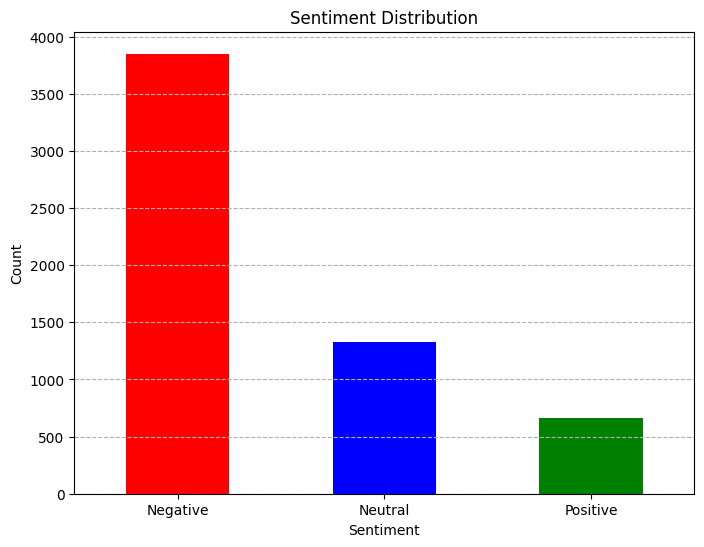

C:\Users\goela\AppData\Local\Temp\ipykernel_708\1389670541.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


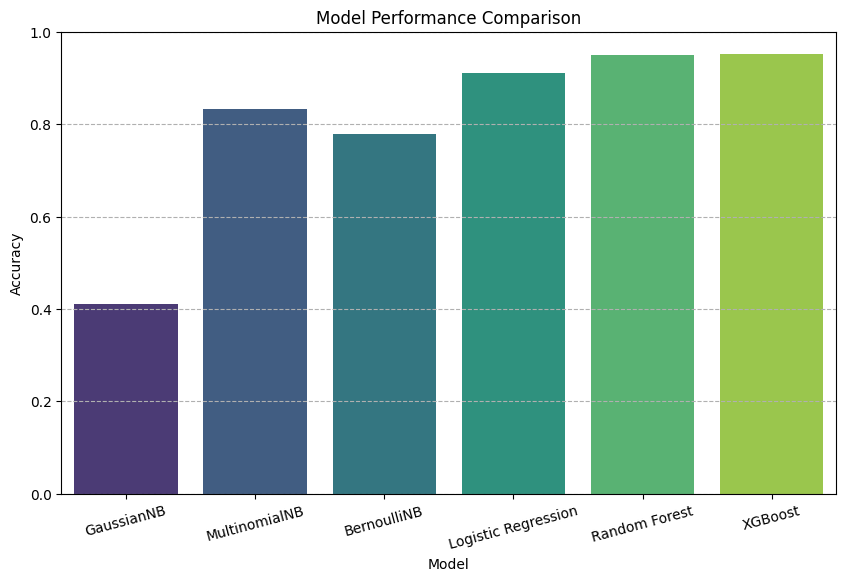

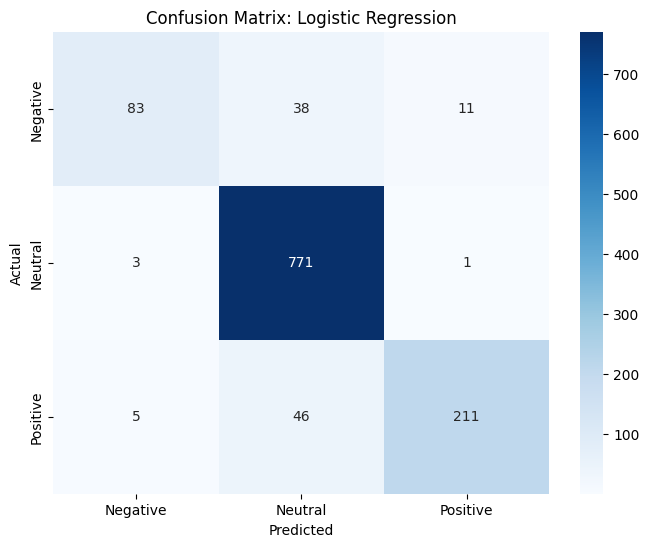

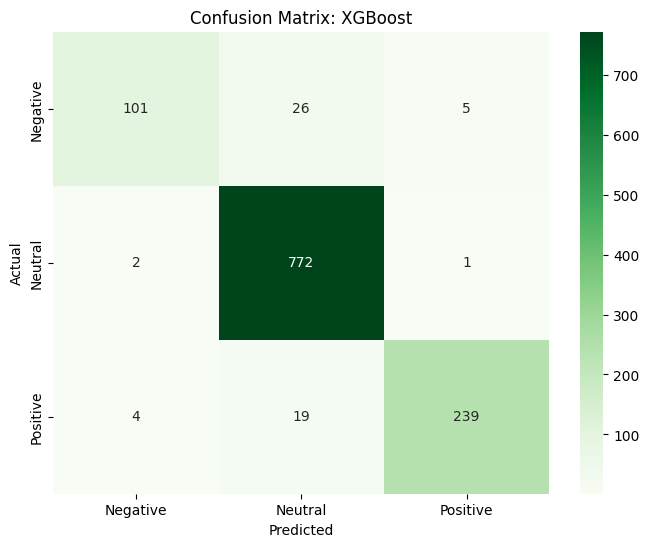

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sentiment Distribution
plt.figure(figsize=(8, 6))
sentiment_counts = df['review'].value_counts()
sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_counts.index = sentiment_labels
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

# Model Performance
model_names = [
    "GaussianNB", "MultinomialNB", "BernoulliNB",
    "Logistic Regression", "Random Forest", "XGBoost"
]
accuracies = [
    accuracy_gnb, accuracy_mnb, accuracy_bnb,
    accuracy_lr, accuracy_rf, accuracy_xgb
]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--')
plt.show()

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for XGBoost
plt.figure(figsize=(8, 6))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
